Title: T-Tests: Intro to Key Terms and Three Types of Tests
Slug: intro-t-test-terms
Summary: Learn about what are t-tests at a high level, the t-distribution, how to calculate t-critical values, degrees of freedom and an overview of the three types of tests. Lessons are in Python and use statistical packages.
Date: 2019-2-11 14:40  
Category: Math
Subcategory: Inferential Statistics
PostType: Article
Keywords: intro t-tests terms python
Tags: t-tests, python
Authors: Dan Friedman

A t-test is a type of statistical hypothesis test. This type of test can determine if 1) a sample mean is *significantly* different from a known population mean or 2) a sample mean is *significantly* different from another sample mean. Typically, we associate t-tests with the latter.

There are three distinct types of t-tests: one sample t-tests, dependent sample t-tests and independent sample t-tests. Each type of test involves a comparison of *two* groups. 

Hypothesis tests for comparing *multiple* groups are called <a href='https://en.wikipedia.org/wiki/Analysis_of_variance'>analysis of variance</a> (ANOVA) and will be covered in another post.

Each of the three types of tests involve the same variable tested in the two groups. For example, a t-test can compare scores on the *same* final exam for one teacher's students and another teacher's students. However, if one teacher provides an exam with different questions than another teacher, a simple hypothesis test can't adequately compare the students' performance against the other class because there are **lurking variables**. These are variables that are not explained in the single score of student's performance but would affect the interpretation of the t-tests results. Some examples of lurking variables are difficulty of questions, number of questions on the exam and time allotted to complete the exam.

### Overview of Three Types of t-tests

type of test | group 1 | group 2 | purpose  
--- | --- | --- | --- 
one sample t-test | population | sample | tests whether the mean of a population is *significantly* different than a sample mean that's not included in the population
dependent sample t-test | sample | sample | tests whether the difference in means of two depenendent samples is *significantly* different 
independent sample t-test | sample | sample | tests whether the difference in means of two independent samples is *significantly* different 

Each of these tests is considered a <a href='https://en.wikipedia.org/wiki/Parametric_statistics'>*parametric test*</a> because they assume that data comes from a population that meets specific probability distribution standards. These data requirements will be discussed individually for each test in separate posts.

### One Sample t-test Descriptive Example

There was a private guitar teacher who taught students who have no previous guitar experience to play the song *Ziggy Stardust* over the course of 3 months. Similarly, there was a music academy that taught thousands of students who have no previous guitar experience to play the song *Ziggy Stardust* over the course of 3 months. At the end of 3 months, all students from each of these programs were graded on their final performance of *Ziggy Stardust*. An official proctor counted the number of errors in each student's performance. 

After all the data was collected, I calculated the mean number of errors by the private teacher's students and by the academy's students. Was there a *significant* difference in the average number of errors for students' performance between the private teacher and the academy?

In this example, I consider the academy of students to be the *population* and the group of students from the private teacher to be a *sample*.

$H_{o}: \mu_{academy}=\bar{x}_{\textrm{private teacher}}$

$H_{o}: \mu_{academy}\neq\bar{x}_{\textrm{private teacher}}$

### Dependent Sample t-test Descriptive Example

A sample of 19 people were told to lie in bed ready to fall asleep at 10pm every night and would be woken up by an alarm at 6:30am for 15 days in a row. In that period, they tried to sleep as much as possible. With each night's sleep, sensors and a computer helped record a measurement of that person's total hours slept. This same test was later performed for the same group of people under the same circumstances, but with one difference. Each night a person took a sleeping pill at 9:30pm. 

After all the data was collected, I calculated the mean number of hours slept for people without using the pill and with using the pill. Does the sleeping pill help *significantly* increase the average hours slept for the group than without the pill? 

$H_{o}: \mu_{\textrm{no pill}} <= \mu_{pill}$

$H_{o}: \mu_{\textrm{no pill}} > \mu_{pill}$

This is considered a pretest posttest type of t-test for dependent samples. The samples are considered *dependent* on one another because the *same* people who took the sleep test without the pills later the test again with sleeping pills.

The data was collected from two different samples. However, in the hypotheses above, I use symbols of $\mu$ (a population mean) instead of $\bar{x}$ (a sample mean). This may seem confusing since we don't *exactly* know the values of $\mu$ for either sample from the start of the test.

These hypotheses are not about the *exact* provided data. Rather, they're inferences about the *expected* population means from which the samples come from. A proper t-test analysis performs calculations to help *infer* what the *expected* population mean of each sample would be given just a sample mean. This description is part of the field of **inferential statistics**: use of a random sample of data taken from a population to describe and make inferences about the population. These inferences are important because they help to explain what *would likely* happen if this same sleeping test was performed on a larger population of people. 

Typically, in a dependent t-test example such as this, the exact populations are currently unknwown or one is unable to access the population data.

### Independent Sample t-test Descriptive Example

There was a sample of professional basketball players in 1940 that attempted to jump as high as they could and measurements were taken on their reach by the top of their hande. The same test was performed on a sample of professional basketball players in 2019. After all this data was collected, I calculated the mean height in inches reached by the sample of players in 1940 and 2019. Do professional basketball players in 2019 jump *significantly* higher on average than basketball players in 1940?

Similar to the example with dependent t-tests above, these hypotheses are an *inference* on the *expected* true population means from which each sample comes from.

$H_{o}$: $\mu_{1940} >= \mu_{2019}$

$H_{A}$: $\mu_{1940} < \mu_{2019}$

### Setup Code

#### Import Modules

In [1]:
from scipy.stats import t
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

#### Set Visualization Style

In [2]:
sns.set_context('talk')
sns.set_style("darkgrid")

### t-distribution

The **t-distribution** is a probability distribution used to estimate population parameters in analysis for t-tests. 

The math and logic used to infer the t-distribution is long and complex. For now, I'll provide a concise high-level overview of some calculations needed for a t-test and how a t-distribution comes into play.

Similar to z-tests in the calculation of a z-score, a t-test requires calculation of a t-statistic. A one-sample t-test helps determine if the mean of a population is *significantly* different than a sample mean that's not included in the population. Both the mean and population have the same variable measurement. The equation for the t-statistic for a one-sample t-test is:

$$t=\frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}}$$

- $\bar{x}$ is sample mean and is a point estimate
- $\mu$ is our *known* current population mean
- $\frac{s}{\sqrt{n}}$ is our expected standard error for $\mu_{0}$ - the expected standard deviation of population that $\bar{x}$ comes from
- $s$ is the sample standard deviation (remember to use bessel's correction with $n-1$ in the denominator)
- $n$ is the sample size

The calculation of the t-statistic varies with types of tests. 

Also, similar to the calculation of z-critical values for z-tests, a t-test requires calculation of a t-critical value which just uses the initial alpha level and $n$ - the sample size. This calculation of the t-critical value utilizes the t-distribution and helps us determine the probability that the sample would come from the population its being compared to.

For a t-test, we compare where the resulting t-statistic lies on the t-distribution. In the t-distribution, the x-axis consists of t-values and the y-axis consists of the probability of occurences.

#### Visualization of a t-distribution and a t-statistic

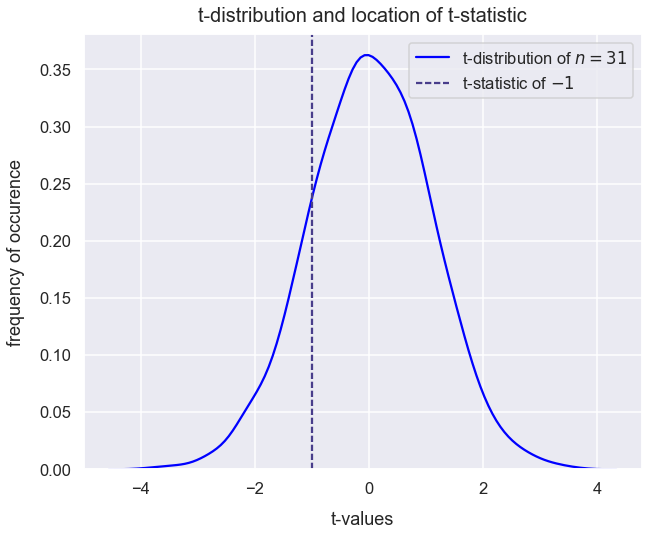

In [3]:
plt.figure(figsize=(10, 8))
np.random.seed(5)
t_distribution_df_30 = np.random.standard_t(30, size=2000)
sns.distplot(t_distribution_df_30, color='blue', hist=False, label='t-distribution of $n=31$')
plt.axvline(x=-1, color='darkslateblue', linestyle='--', label='t-statistic of $-1$')
plt.xlabel("t-values", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);
plt.title("t-distribution and location of t-statistic", y=1.015, fontsize=20)
plt.legend();

 The t distribution has the following characteristics:

- mean = 0 
- symmetrical
- typically not exactly normal given small $n$ values; a very high $n$ value will lead to a more normal t-distribution
- $variance = v/(v-2)$ in which $v$ is the degrees of freedom and $v>2$ (degrees of freedom explained below)

T-test errors are more prone to errors in results than a z-test. The reason for this is that compared to the z-distribution, the t-distribution has larger variance. Visually we see a wider curve and thicker tails.

#### Visualization of z-distribution and t-distribution

This visualization is based on certain parameters such as the size of samples and/or population. They won't always appear in the exact shapes below but I still think the comparisons are a good *general* point of reference.

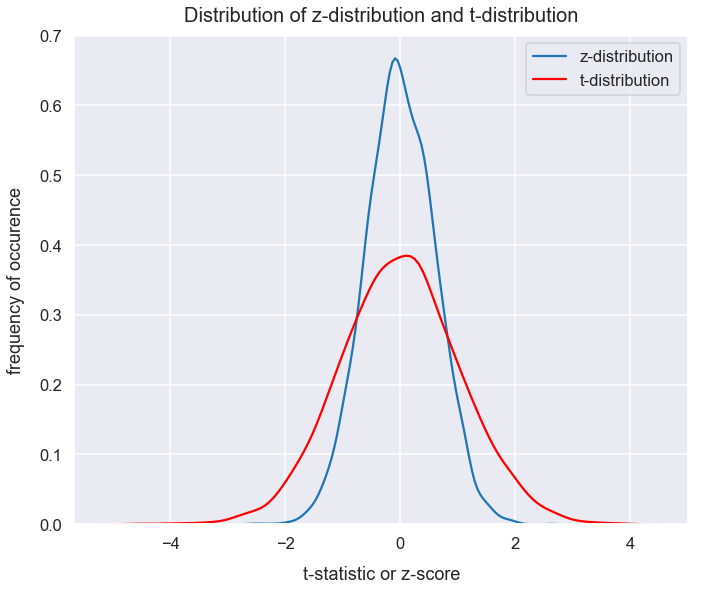

In [12]:
plt.figure(figsize=(11, 9))
z_distribution = np.random.normal(loc=0, scale=0.6, size=6000)
t_distribution = np.random.standard_t(20, size=5000)
sns.distplot(z_distribution, hist=False, label='z-distribution')
sns.distplot(t_distribution, color='red', hist=False, label='t-distribution')
plt.ylabel("frequency of occurence", labelpad=14)
plt.xlabel("t-statistic or z-score", labelpad=14)
plt.title("Distribution of z-distribution and t-distribution", y=1.015, fontsize=20)
plt.legend();

#### Degrees of Freedom

We utilize **degrees of freedom** in t-test calculations. Degrees of freedom is simply the freedom to vary. Imagine you had 10 students in your classroom who completed the final exam. If I picked out scores for 9 of the students, you must pick out the *one* remaining student's score. For any 9 student scores I pick, you have $10-1 = 9$ student's scores to choose from. In variable terms, this means if you have $n$ numbers to choose from, you have $n-1$ degrees of freedom.

In statistics, the calculation for degrees of freedom is the count of observations in the sample that are free to vary when estimating statistical parameters.

The t-distribution is defined by the degrees of freedom value.

When the size of the sample, $n$, increases:
    - t-distribution approaches a more normal distribution
    - t-distribution gets skinner tails (b/c the standard error decreases)
    - standard deviation approaches the value of the inferred population standard deviation
    
Also, as $n$ increases, our confidence increases in our inference of where the true population mean (based off of $n$) is expected to be.



    
Therefore, when running a one-sample t-test, it's ideal to utilize a larger sample size $n$ to increase confidence in the inferred population that's based off the sample.

#### Visualization of t-distributions with Various Degrees of Freedom

This visualization below outlines the points mentioned above about how the t-distribution changes with an increase in $n$.

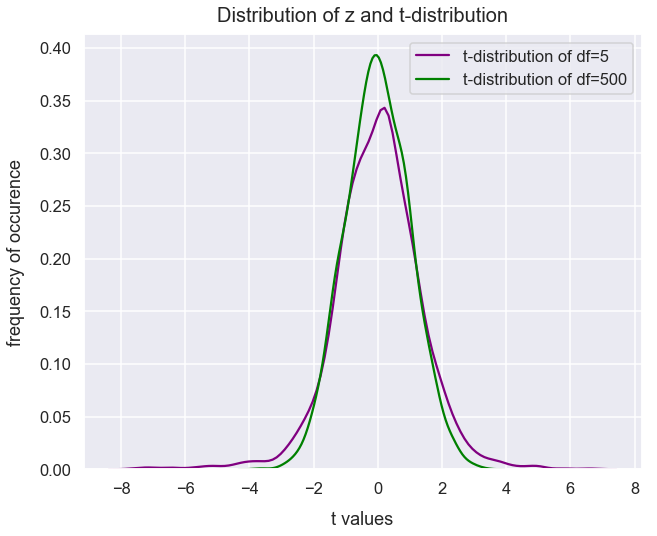

In [5]:
plt.figure(figsize=(10, 8))
np.random.seed(5)
t_distribution_df_5 = np.random.standard_t(5, size=2000)
t_distribution_df_500 = np.random.standard_t(500, size=2000)
sns.distplot(t_distribution_df_5, color='purple', hist=False, label='t-distribution of df=5')
sns.distplot(t_distribution_df_500, color='green', hist=False, label='t-distribution of df=500')
plt.xlabel("t values", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);
plt.title("Distribution of z and t-distribution", y=1.015, fontsize=20)
plt.legend();

### t-critical Value

For t-tests, we need to calculate a t-critical value which has some similarities to a z-score (critical) value. 

Similarities of t-critical value to a z-score:

- identifies a boundary for a critical region of its respective distribution (for a t-test, the t-distribution)
- for a one-tailed test, there's *either* a positive or negative critical value with one tail probability
- for a two-tailed test, there's a positive *and* negative critical value with their respective tail probabilities

For a t-test, we utilize knowledge of the alpha level, direction of the test and degrees of freedom.

I'm familiar with two ways to calculate the t-critical value. One way is using a table and another is done programatically using Python. I prefer the latter.

<a href='https://udacity.com'>Udacity</a> hosts a table to identify t-critical values at <a href='https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg'>this page</a>. The values inside the table represent the t-critical values. Each row shows these t-critical values for a degrees of freedom (df) value. The columns are labeled for a right tail probability. This table can be used for one-tail and two-tail tests.

In Python, as part of the `Scipy` package and `t` class, there's a method called `ppf()` that returns the t-critical value. The arguments of the method are:

- `q` for the area under the curve of the t-distribution to the left of the t-critical value
- `df` for the degrees of freedom (equivalent to $n-1$ for a one sample t-test)

Below is an example for a one-tailed test in the positive direction with an alpha of $0.05$ and a degrees of freedom value of $30$. Since this is a positive direction t-test, the area under the curve of the t-distribution to the left of the t-critical value is equivalent to $1-0.05 = 0.95$. The returned t-critical value is `1.698`.

In [6]:
stats.t.ppf(q=0.95, df=30)

1.6972608943617378

In the table, for the row of *df* equal to $30$ and *tail probability p* (that aligns with their picture at the top of the page) equal to $.05$ there's the equivalent t-critical value of $1.697$.

If this was a one-tailed test in the negative direction with the same alpha of $0.05$ and degrees of freedom of $30$, the area under the curve of the t-distribution to the left of the t-critical value should be $0.05$. I can use the `ppf()` method and that returns a value of `-1.698`. 

In [7]:
stats.t.ppf(q=0.05, df=30)

-1.6972608943617384

This example illustrates that the t-table can be used for both one-tailed tests in the positive and negative direction.

This method works for two-tailed tests too. For an alpha level of $0.05$, you have $0.025$ area under the curve to the left of the negative t-critical value and to the right of the positive t-critical value. Let's utilize a degrees of freedom value of $30$ again. Via the t-table, the t-critical value is 2.042 which we know means the t-critical value is $\pm2.042$ since this is a two-tailed test.

The `ppf()` method returns the same t-critical value of $-2.042$ which also equates to $\pm2.042$ for the two-tailed test. 

In [8]:
stats.t.ppf(q=0.025, df=30)

-2.042272456301238

In a t-test, to reject the null hypothesis, I'd have to find a t-critical value greater than $2.042$ or less than $-2.042$.

#### Visualization of Change in t-critical Value with Change in Degrees of Freedom

For an alpha level, as the degrees of freedom increases past $22$, there is little change in the corresponding t-critical value.

Thus, if I wanted to run a one sample t-test, I would likely just get a sample of roughly size $23$ which equates to a degree of freedom of $22$. I'd only opt to retrive a larger sample if retrieving that data was easy. 

Below is a visualization that shows the change in t-critical value as the sample size increases for a one sample t-test in the positive direction with an alpha level of $0.05$. 

In [9]:
t_critical_values = []
degree_of_freedom_values = list(range(4, 200))
for df_value in degree_of_freedom_values:
    t_critical_value = t.ppf(q=0.95, df=df_value)
    t_critical_values.append(t_critical_value)

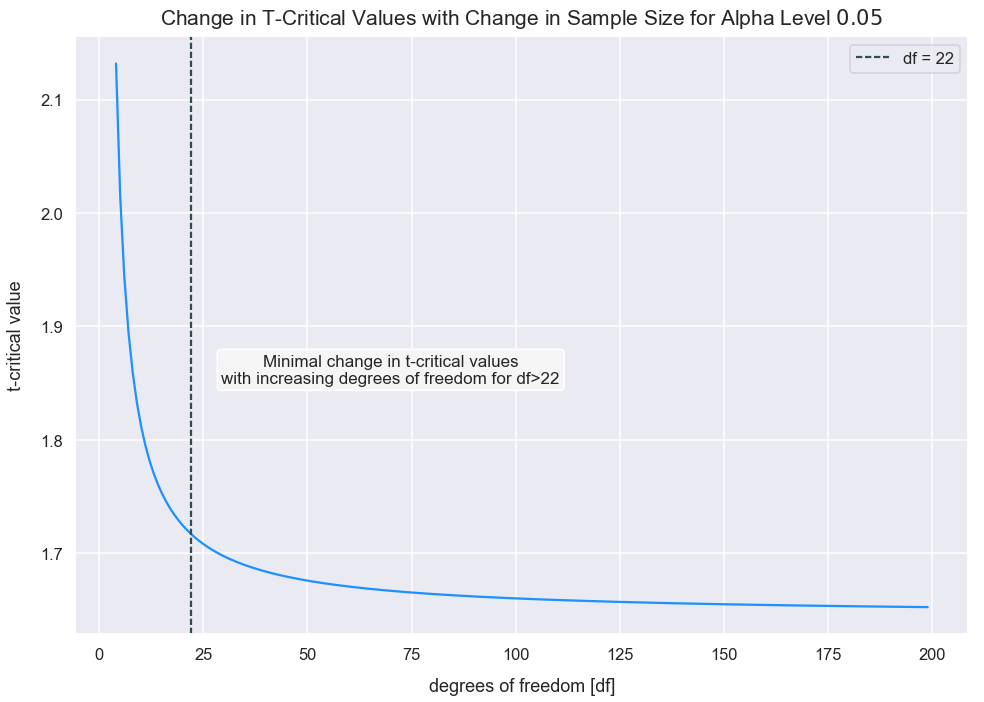

In [10]:
plt.figure(figsize=(16, 11))
plt.plot(degree_of_freedom_values, t_critical_values, color='dodgerblue')
plt.axvline(x=22, label='df = 22', color='darkslategray', linestyle='--')
plt.legend()
plt.text(x=70, y=1.85, horizontalalignment='center', fontsize=17, 
         s="Minimal change in t-critical values\nwith increasing degrees of freedom for df>22", 
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.25"))
plt.xlabel("degrees of freedom [df]", labelpad=15)
plt.ylabel("t-critical value", labelpad=15)
plt.title("Change in T-Critical Values with Change in Sample Size for Alpha Level $0.05$", y=1.01, fontsize=21);

### Conditions for Rejecting the Null Hypothesis

Similar to z-tests, with each t-test hypothesis, we want to determine if there is sufficient evidence to reject the null hypothesis. Below are details of hypothesis tests and means for evaluating the tests.

Below, the symbols of $\mu_{a}$ and $\mu_{b}$ are relevant for *just* dependent and independent sample t-tests. 

null hypothesis | alternative hypothesis | alternative hypothesis interpretation | number of tails on t-distribution | tail(s) of t-distribution to reject the null
--- | --- | --- | --- | --- 
$\mu_{a} >=\mu_{b}$ | $\mu_{a} < \mu_{b}$ | estimated population mean which contains sample $a$ will be less than the estimated population mean which contains sample $b$ | one | left
$\mu_{a} <= \mu_{b}$ | $\mu_{a} > \mu_{b}$ | estimated population mean which contains sample $a$ will be greater than the estimated population mean which contains sample $b$  | one | right
$\mu_{a} = \mu_{b}$ | $\mu_{a} \neq \mu_{b}$ | no prediction on a direction for the estimated population parameters | two | left or right

Here's what it means to reject the null hypothesis:

- The t-critical value falls within the t-critical region
    - For a one-tailed test in the positive direction, the t-statistic is greater than the t-critical value
    - For a one-tailed test in the negative direction, the t-statistic is less than the t-critical value
    - For a two-tailed test, the t-statistic is greater than the positive t-critical value *or* the t-statistic is less than the negative t-critical value
- The probability of obtaining the esatimated population parameter due to random chance (the p-value) is less than the alpha level